# Understanding Color Spaces with OpenCV

## A Beginner's Guide

Welcome to this beginner-friendly tutorial on understanding color spaces using OpenCV! This tutorial is designed for those who are new to both image processing and OpenCV. We'll explore what color spaces are, why they matter, and how to work with them using Python and OpenCV.

By the end of this tutorial, you'll have a solid understanding of different color spaces and how to convert between them using OpenCV.


<center>
<!-- <img src="doc/img.jpg" alt="Machine Learning"  /> -->
<img src="color_space.png" alt="color_space.png"  />

</center>

## Setting Up Our Environment

First, let's import the necessary libraries. We'll need OpenCV for image processing, Matplotlib for displaying images, and NumPy for numerical operations.

In [23]:
! poetry add matplotlib

The following packages are already present in the pyproject.toml and will be skipped:

  - matplotlib

If you want to update it to the latest compatible version, you can use `poetry update package`.
If you prefer to upgrade it to the latest available version, you can use `poetry add package@latest`.

Nothing to add.


In [24]:
# Import necessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Configure matplotlib to display images inline
%matplotlib inline

# Set figure size for better visualization
plt.figure(figsize=(10, 8))

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

## What Are Color Spaces?

A color space is a specific organization of colors that allows us to consistently represent and visualize colors across different devices and applications. Think of it as a system that helps us describe and reproduce colors in a standardized way.

Each color space has its own unique characteristics and is designed for specific purposes. Some color spaces are better for certain applications than others. For example, some are optimized for digital displays (like RGB), while others are better for printing (like CMYK) or for specific image processing tasks (like HSV for color-based segmentation).

Understanding color spaces is fundamental to image processing because many algorithms perform differently depending on the color space used. By choosing the right color space for a particular task, we can often improve the results significantly.

## Loading and Displaying an Image

Let's start by loading a sample image and displaying it. OpenCV reads images in BGR format (Blue-Green-Red) by default, which is different from the RGB (Red-Green-Blue) format that most other libraries use.

Image loaded successfully!
Image dimensions: (379, 512, 3)


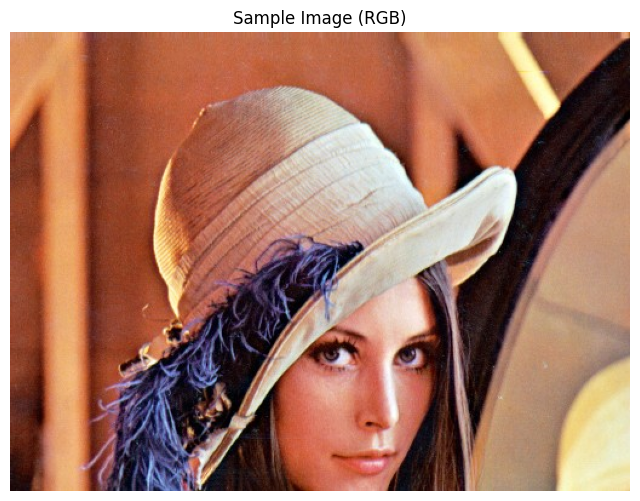

In [27]:
# Load the image
image = cv2.imread('img1.jpg')

# Check if the image was loaded successfully
if image is None:
    print("Error: Could not load image")
else:
    print("Image loaded successfully!")
    print(f"Image dimensions: {image.shape}")
    
    # OpenCV loads images in BGR format, but Matplotlib expects RGB
    # So we need to convert from BGR to RGB for correct display
    rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Display the image
    plt.figure(figsize=(8, 8))
    plt.imshow(rgb_image)
    plt.title('Sample Image (RGB)')
    plt.axis('off')  # Hide axis
    plt.show()

## The BGR Color Space in OpenCV

You might have noticed that we had to convert our image from BGR to RGB before displaying it with Matplotlib. This is because OpenCV uses BGR color ordering by default, while most other libraries (including Matplotlib) use RGB.

BGR is simply RGB with the order of channels reversed. Both BGR and RGB are additive color models where we combine different amounts of the primary colors (red, green, and blue) to create other colors.

Let's visualize the individual BGR channels of our image to better understand how they contribute to the full-color image:

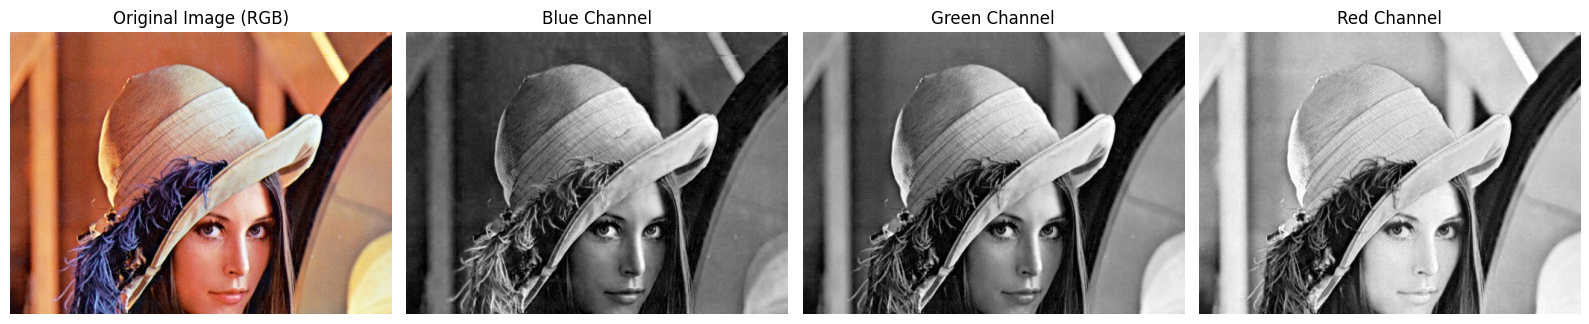

In [34]:
# Split the image into its BGR channels
b, g, r = cv2.split(image)

# Create a figure with 4 subplots
plt.figure(figsize=(16, 4))

# Display the original image
plt.subplot(1, 4, 1)
plt.imshow(rgb_image)
plt.title('Original Image (RGB)')
plt.axis('off')

# Display the Blue channel
plt.subplot(1, 4, 2)
plt.imshow(b, cmap='gray')
plt.title('Blue Channel')
plt.axis('off')

# Display the Green channel
plt.subplot(1, 4, 3)
plt.imshow(g, cmap='gray')
plt.title('Green Channel')
plt.axis('off')

# Display the Red channel
plt.subplot(1, 4, 4)
plt.imshow(r, cmap='gray')
plt.title('Red Channel')
plt.axis('off')

plt.tight_layout()
plt.show()

In the above visualization, brighter areas in each channel image indicate higher intensity of that particular color. For example, in the Red channel image, bright areas correspond to regions with high red content in the original image.

Each channel is an 8-bit grayscale image with pixel values ranging from 0 to 255, where 0 represents no intensity of that color and 255 represents maximum intensity. When these three channels are combined, they create the full-color image we see.

## Converting Between Color Spaces

OpenCV provides the `cv2.cvtColor()` function to convert images from one color space to another. We've already used it to convert from BGR to RGB, but there are many other color spaces available.

The general syntax for color conversion is:
```python
output_image = cv2.cvtColor(input_image, conversion_code)
```

Where `conversion_code` specifies the type of conversion to perform. Let's explore some common color spaces and how to convert to them.

## Grayscale Color Space

The grayscale color space represents images using only shades of gray. Each pixel has a single value representing its intensity, typically from 0 (black) to 255 (white).

Grayscale images are often used as an intermediate step in many image processing algorithms because they simplify the image while retaining important structural information. They're also useful when color information isn't necessary for the task at hand.

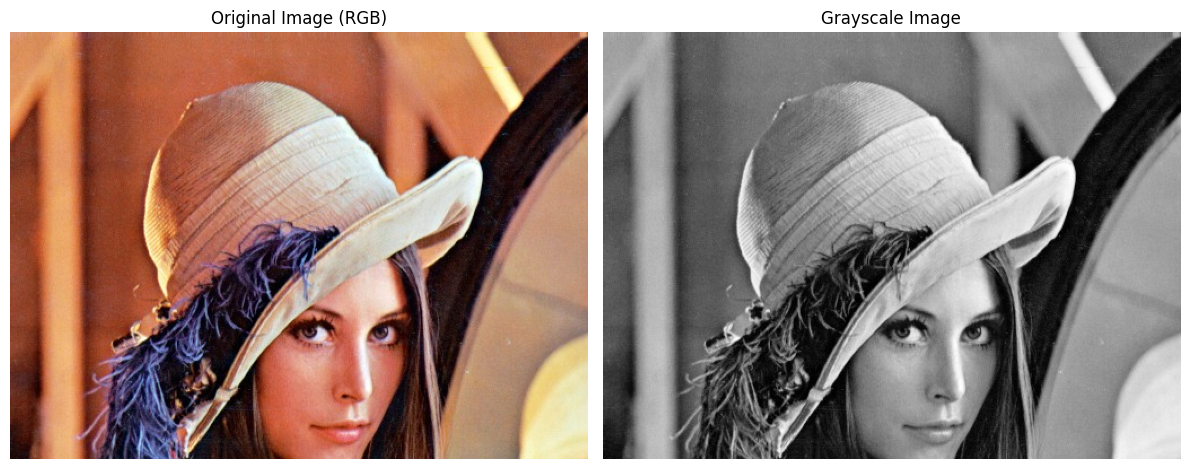

Original image shape: (379, 512, 3)
Grayscale image shape: (379, 512)


In [38]:
# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Display the original and grayscale images side by side
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(rgb_image)
plt.title('Original Image (RGB)')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(gray_image, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')

plt.tight_layout()
plt.show()

# Print the shape of the grayscale image
print(f"Original image shape: {image.shape}")
print(f"Grayscale image shape: {gray_image.shape}")

Notice how the grayscale image has only two dimensions (height and width) while the original image has three dimensions (height, width, and channels). This is because each pixel in a grayscale image is represented by a single value instead of three values (one for each color channel).

The conversion from BGR to grayscale isn't a simple average of the three channels. Instead, it uses a weighted sum that accounts for human perception of color brightness:

Gray = 0.299 × Red + 0.587 × Green + 0.114 × Blue

These weights reflect the fact that human eyes are more sensitive to green light than red or blue.

## HSV Color Space

The HSV (Hue, Saturation, Value) color space is particularly useful for color-based segmentation and tracking. It separates color information (hue) from intensity (value) and purity (saturation), making it more intuitive for certain tasks.

- **Hue**: Represents the color type (like red, blue, or yellow). It's measured in degrees from 0 to 360, but in OpenCV it's scaled to 0-179 (to fit in an 8-bit value).
- **Saturation**: Represents the purity or intensity of the color. It ranges from 0 (gray) to 255 (pure color).
- **Value**: Represents the brightness of the color. It ranges from 0 (black) to 255 (white).

Let's convert our image to HSV and visualize each channel:

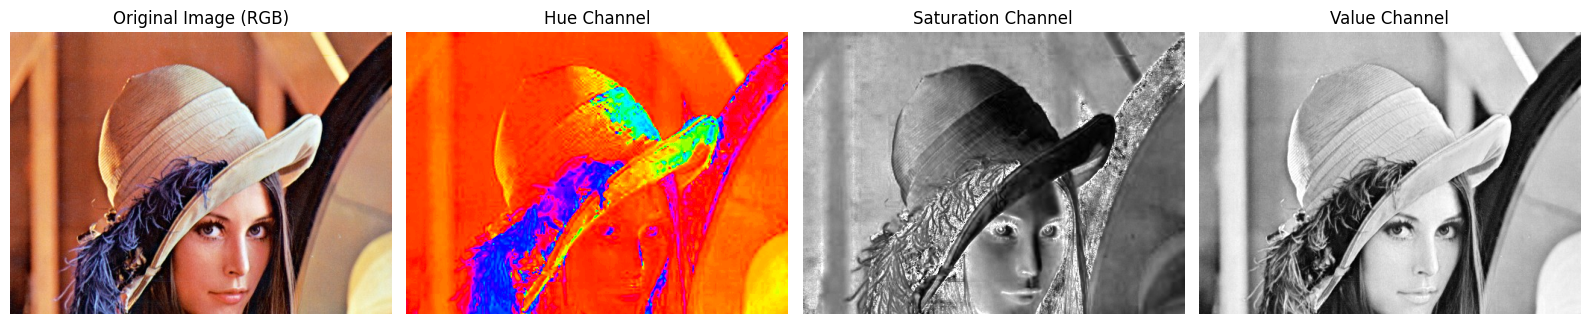

In [39]:
# Convert the image from BGR to HSV
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Split the HSV image into its channels
h, s, v = cv2.split(hsv_image)

# Create a figure with 4 subplots
plt.figure(figsize=(16, 4))

# Display the original image
plt.subplot(1, 4, 1)
plt.imshow(rgb_image)
plt.title('Original Image (RGB)')
plt.axis('off')

# Display the Hue channel
plt.subplot(1, 4, 2)
plt.imshow(h, cmap='hsv')
plt.title('Hue Channel')
plt.axis('off')

# Display the Saturation channel
plt.subplot(1, 4, 3)
plt.imshow(s, cmap='gray')
plt.title('Saturation Channel')
plt.axis('off')

# Display the Value channel
plt.subplot(1, 4, 4)
plt.imshow(v, cmap='gray')
plt.title('Value Channel')
plt.axis('off')

plt.tight_layout()
plt.show()

The HSV color space is particularly useful for tasks like color-based object detection. For example, if you want to detect all red objects in an image, it's much easier to define a range of "red" hues in HSV than in RGB.

Let's see a simple example of how we might use HSV to isolate a specific color range:

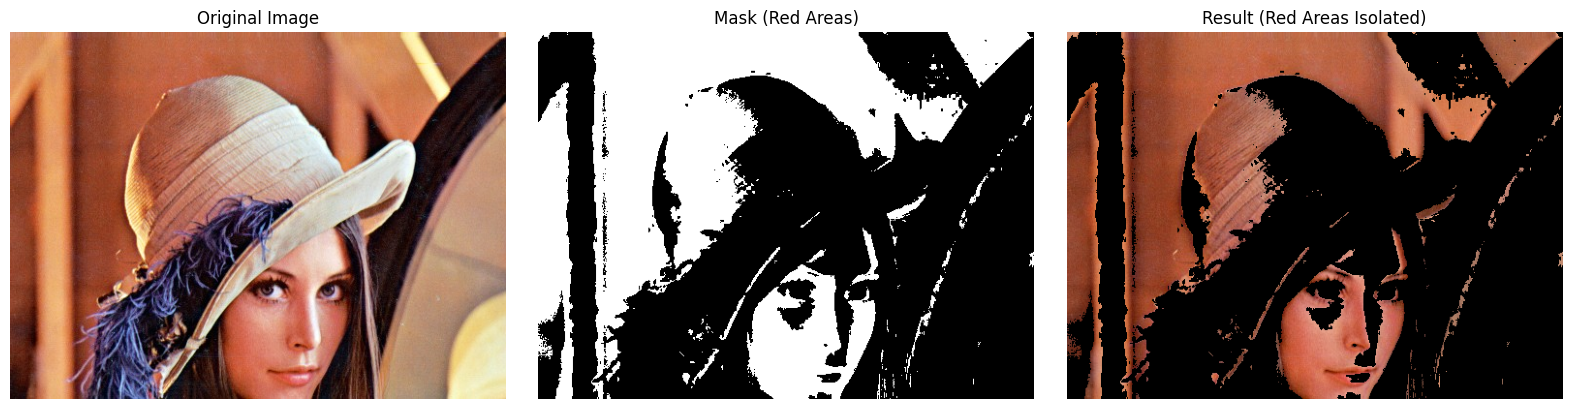

In [40]:
# Define range for a reddish color in HSV
lower_red = np.array([0, 100, 100])
upper_red = np.array([10, 255, 255])

# Create a mask for pixels within the specified range
mask = cv2.inRange(hsv_image, lower_red, upper_red)

# Apply the mask to the original image
result = cv2.bitwise_and(image, image, mask=mask)
result_rgb = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)

# Display the results
plt.figure(figsize=(16, 4))

plt.subplot(1, 3, 1)
plt.imshow(rgb_image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(mask, cmap='gray')
plt.title('Mask (Red Areas)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(result_rgb)
plt.title('Result (Red Areas Isolated)')
plt.axis('off')

plt.tight_layout()
plt.show()

In the above example, we created a mask that isolates pixels within a specific range of HSV values (corresponding roughly to red colors). We then applied this mask to our original image to extract only the red regions.

This kind of color-based segmentation is much easier in HSV than in RGB because in HSV, the color (hue) is separated from brightness (value) and saturation. This means we can define a color regardless of how bright or dark it appears.

## LAB Color Space

The LAB color space (also known as CIELAB or L*a*b*) is designed to approximate human vision. It's particularly useful for tasks that require perceptual uniformity, such as color correction and image enhancement.

- **L**: Represents lightness (0 for black, 100 for white)
- **a**: Represents the green-red component (-128 for green, 127 for red)
- **b**: Represents the blue-yellow component (-128 for blue, 127 for yellow)

Let's convert our image to LAB and visualize each channel:

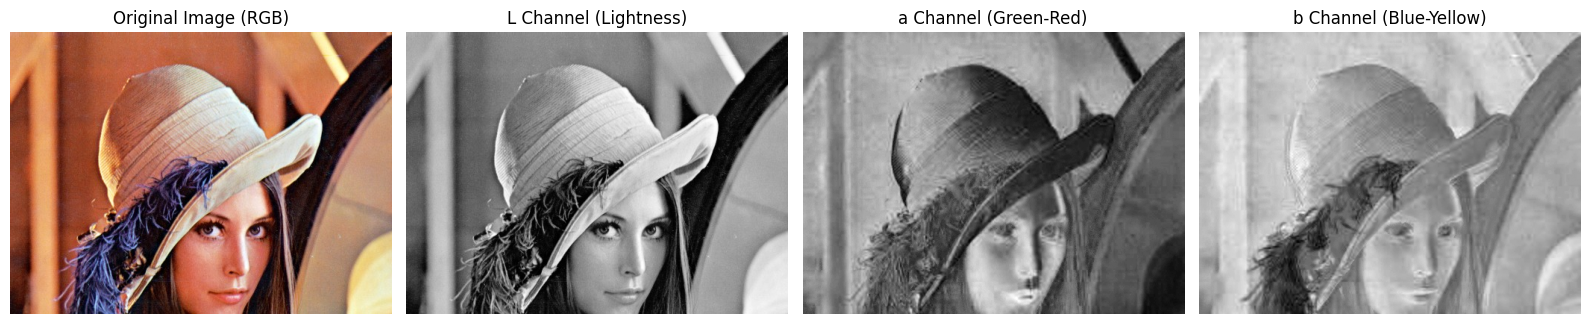

In [41]:
# Convert the image from BGR to LAB
lab_image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

# Split the LAB image into its channels
l, a, b = cv2.split(lab_image)

# Create a figure with 4 subplots
plt.figure(figsize=(16, 4))

# Display the original image
plt.subplot(1, 4, 1)
plt.imshow(rgb_image)
plt.title('Original Image (RGB)')
plt.axis('off')

# Display the L channel
plt.subplot(1, 4, 2)
plt.imshow(l, cmap='gray')
plt.title('L Channel (Lightness)')
plt.axis('off')

# Display the a channel
plt.subplot(1, 4, 3)
plt.imshow(a, cmap='gray')
plt.title('a Channel (Green-Red)')
plt.axis('off')

# Display the b channel
plt.subplot(1, 4, 4)
plt.imshow(b, cmap='gray')
plt.title('b Channel (Blue-Yellow)')
plt.axis('off')

plt.tight_layout()
plt.show()

The LAB color space is particularly useful for image enhancement and color correction because it separates lightness from color information. This allows us to modify the brightness of an image without affecting its colors, or to adjust colors without changing brightness.

For example, we could enhance the contrast of an image by only modifying its L channel:

In [ ]:
# Create a copy of the LAB image
lab_enhanced = lab_image.copy()

# Enhance contrast of the L channel using CLAHE (Contrast Limited Adaptive Histogram Equalization)
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
lab_enhanced[:, :, 0] = clahe.apply(l)

# Convert back to BGR and then to RGB for display
enhanced_image = cv2.cvtColor(lab_enhanced, cv2.COLOR_LAB2BGR)
enhanced_rgb = cv2.cvtColor(enhanced_image, cv2.COLOR_BGR2RGB)

# Display the original and enhanced images side by side
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(rgb_image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(enhanced_rgb)
plt.title('Enhanced Image (L channel contrast)')
plt.axis('off')

plt.tight_layout()
plt.show()

In this example, we enhanced the contrast of the image by applying CLAHE (Contrast Limited Adaptive Histogram Equalization) to the L channel only. This improved the overall contrast of the image without affecting its colors.

## YCrCb Color Space

The YCrCb color space is commonly used in video and image compression standards like JPEG and MPEG. It separates the luminance component (Y) from the chrominance components (Cr and Cb).

- **Y**: Represents the luminance (brightness)
- **Cr**: Represents the red-difference chroma component
- **Cb**: Represents the blue-difference chroma component

Let's convert our image to YCrCb and visualize each channel:

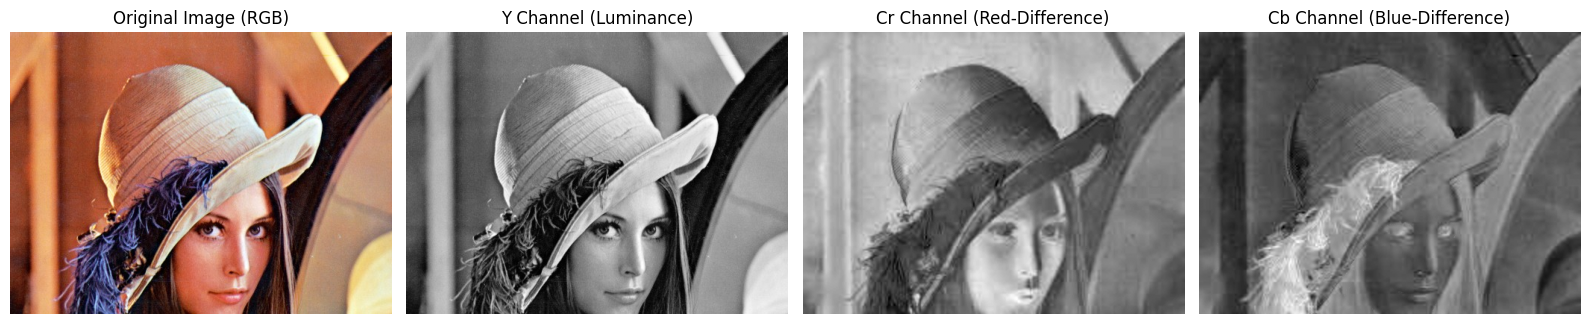

In [42]:
# Convert the image from BGR to YCrCb
ycrcb_image = cv2.cvtColor(image, cv2.COLOR_BGR2YCrCb)

# Split the YCrCb image into its channels
y, cr, cb = cv2.split(ycrcb_image)

# Create a figure with 4 subplots
plt.figure(figsize=(16, 4))

# Display the original image
plt.subplot(1, 4, 1)
plt.imshow(rgb_image)
plt.title('Original Image (RGB)')
plt.axis('off')

# Display the Y channel
plt.subplot(1, 4, 2)
plt.imshow(y, cmap='gray')
plt.title('Y Channel (Luminance)')
plt.axis('off')

# Display the Cr channel
plt.subplot(1, 4, 3)
plt.imshow(cr, cmap='gray')
plt.title('Cr Channel (Red-Difference)')
plt.axis('off')

# Display the Cb channel
plt.subplot(1, 4, 4)
plt.imshow(cb, cmap='gray')
plt.title('Cb Channel (Blue-Difference)')
plt.axis('off')

plt.tight_layout()
plt.show()

The YCrCb color space is particularly useful for skin detection and compression. Human skin tones tend to cluster in a small region in the CrCb plane, regardless of ethnicity or lighting conditions. This makes YCrCb a good choice for applications like face detection.

Let's see a simple example of skin detection using YCrCb:

In [ ]:
# Define range for skin color in YCrCb
lower_skin = np.array([0, 133, 77])
upper_skin = np.array([255, 173, 127])

# Create a mask for pixels within the specified range
skin_mask = cv2.inRange(ycrcb_image, lower_skin, upper_skin)

# Apply the mask to the original image
skin_result = cv2.bitwise_and(image, image, mask=skin_mask)
skin_result_rgb = cv2.cvtColor(skin_result, cv2.COLOR_BGR2RGB)

# Display the results
plt.figure(figsize=(16, 4))

plt.subplot(1, 3, 1)
plt.imshow(rgb_image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(skin_mask, cmap='gray')
plt.title('Skin Mask')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(skin_result_rgb)
plt.title('Detected Skin')
plt.axis('off')

plt.tight_layout()
plt.show()

In this example, we created a mask that isolates pixels within a specific range of YCrCb values corresponding to human skin tones. We then applied this mask to our original image to extract only the skin regions.

This kind of skin detection is more robust in YCrCb than in RGB because the chrominance components (Cr and Cb) are separated from the luminance (Y), making the detection less sensitive to lighting conditions.

## Comparing Color Spaces

Now that we've explored several color spaces, let's compare them side by side to better understand their differences and use cases:

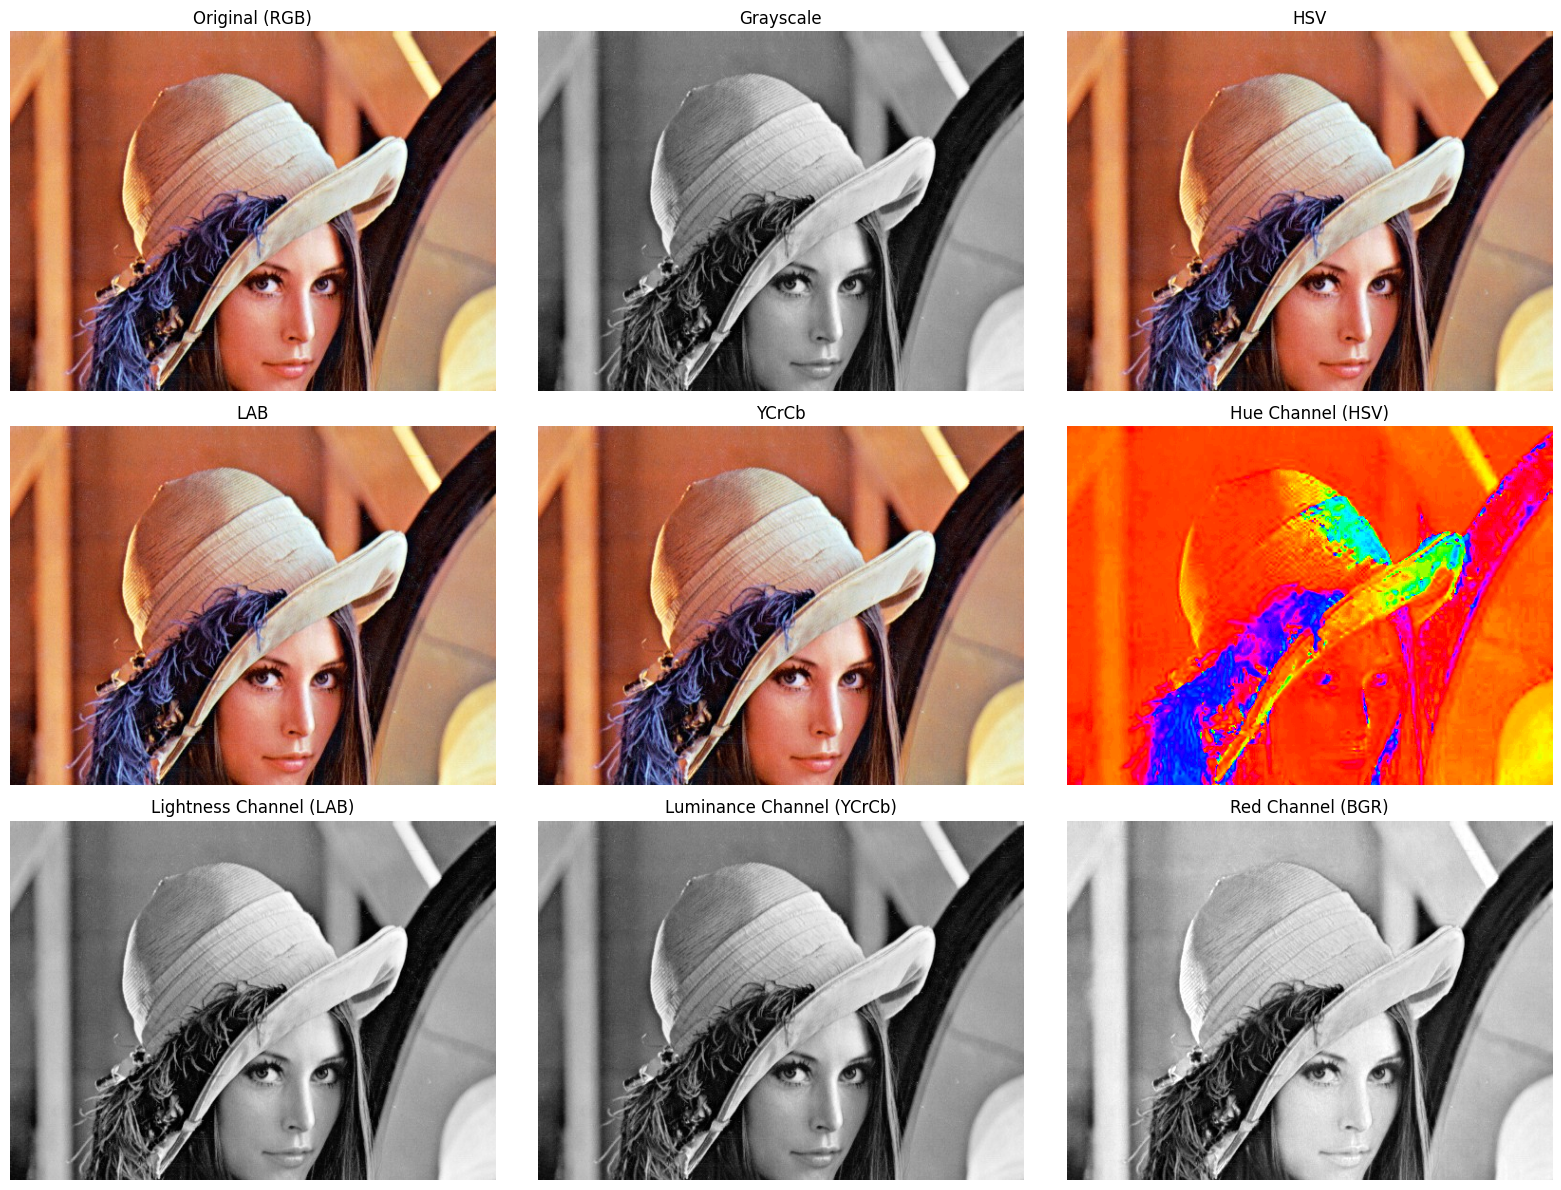

In [43]:
# Create a figure with multiple subplots
plt.figure(figsize=(16, 12))

# Original RGB image
plt.subplot(3, 3, 1)
plt.imshow(rgb_image)
plt.title('Original (RGB)')
plt.axis('off')

# Grayscale
plt.subplot(3, 3, 2)
plt.imshow(gray_image, cmap='gray')
plt.title('Grayscale')
plt.axis('off')

# HSV representation (pseudo-colored)
hsv_display = cv2.cvtColor(hsv_image, cv2.COLOR_HSV2RGB)
plt.subplot(3, 3, 3)
plt.imshow(hsv_display)
plt.title('HSV')
plt.axis('off')

# LAB representation (pseudo-colored)
lab_display = cv2.cvtColor(lab_image, cv2.COLOR_LAB2RGB)
plt.subplot(3, 3, 4)
plt.imshow(lab_display)
plt.title('LAB')
plt.axis('off')

# YCrCb representation (pseudo-colored)
ycrcb_display = cv2.cvtColor(ycrcb_image, cv2.COLOR_YCrCb2RGB)
plt.subplot(3, 3, 5)
plt.imshow(ycrcb_display)
plt.title('YCrCb')
plt.axis('off')

# Individual channels from different color spaces
plt.subplot(3, 3, 6)
plt.imshow(h, cmap='hsv')
plt.title('Hue Channel (HSV)')
plt.axis('off')

plt.subplot(3, 3, 7)
plt.imshow(l, cmap='gray')
plt.title('Lightness Channel (LAB)')
plt.axis('off')

plt.subplot(3, 3, 8)
plt.imshow(y, cmap='gray')
plt.title('Luminance Channel (YCrCb)')
plt.axis('off')

plt.subplot(3, 3, 9)
plt.imshow(r, cmap='gray')
plt.title('Red Channel (BGR)')
plt.axis('off')

plt.tight_layout()
plt.show()

## When to Use Each Color Space

Here's a summary of when to use each color space:

1. **BGR/RGB**:
   - Default color space for most image processing libraries
   - Good for displaying images and general-purpose processing
   - BGR is OpenCV's default format, while RGB is used by most other libraries

2. **Grayscale**:
   - When color information is not necessary
   - For edge detection, contour finding, and other shape-based algorithms
   - To reduce computational complexity
   - As an intermediate step in many image processing pipelines

3. **HSV**:
   - For color-based segmentation and object detection
   - When you need to isolate specific colors
   - For tasks that require separating color (hue) from intensity (value)
   - In environments with varying lighting conditions

4. **LAB**:
   - For perceptually uniform color processing
   - For color correction and enhancement
   - When working with color differences that match human perception
   - For tasks that require separating lightness from color information

5. **YCrCb**:
   - For skin detection and face recognition
   - In video and image compression
   - When working with JPEG or MPEG formats
   - For tasks that require separating luminance from chrominance

## Common Color Space Conversion Codes in OpenCV

Here's a reference table of common color conversion codes used with `cv2.cvtColor()`:

In [44]:
# Create a table of common color conversion codes
conversion_codes = [
    ['BGR to RGB', 'cv2.COLOR_BGR2RGB'],
    ['RGB to BGR', 'cv2.COLOR_RGB2BGR'],
    ['BGR to Grayscale', 'cv2.COLOR_BGR2GRAY'],
    ['RGB to Grayscale', 'cv2.COLOR_RGB2GRAY'],
    ['BGR to HSV', 'cv2.COLOR_BGR2HSV'],
    ['RGB to HSV', 'cv2.COLOR_RGB2HSV'],
    ['HSV to BGR', 'cv2.COLOR_HSV2BGR'],
    ['HSV to RGB', 'cv2.COLOR_HSV2RGB'],
    ['BGR to LAB', 'cv2.COLOR_BGR2LAB'],
    ['RGB to LAB', 'cv2.COLOR_RGB2LAB'],
    ['LAB to BGR', 'cv2.COLOR_LAB2BGR'],
    ['LAB to RGB', 'cv2.COLOR_LAB2RGB'],
    ['BGR to YCrCb', 'cv2.COLOR_BGR2YCrCb'],
    ['RGB to YCrCb', 'cv2.COLOR_RGB2YCrCb'],
    ['YCrCb to BGR', 'cv2.COLOR_YCrCb2BGR'],
    ['YCrCb to RGB', 'cv2.COLOR_YCrCb2RGB']
]

# Display the table
from tabulate import tabulate
print(tabulate(conversion_codes, headers=['Conversion', 'OpenCV Code'], tablefmt='grid'))

+------------------+---------------------+
| Conversion       | OpenCV Code         |
+==================+=====================+
| BGR to RGB       | cv2.COLOR_BGR2RGB   |
+------------------+---------------------+
| RGB to BGR       | cv2.COLOR_RGB2BGR   |
+------------------+---------------------+
| BGR to Grayscale | cv2.COLOR_BGR2GRAY  |
+------------------+---------------------+
| RGB to Grayscale | cv2.COLOR_RGB2GRAY  |
+------------------+---------------------+
| BGR to HSV       | cv2.COLOR_BGR2HSV   |
+------------------+---------------------+
| RGB to HSV       | cv2.COLOR_RGB2HSV   |
+------------------+---------------------+
| HSV to BGR       | cv2.COLOR_HSV2BGR   |
+------------------+---------------------+
| HSV to RGB       | cv2.COLOR_HSV2RGB   |
+------------------+---------------------+
| BGR to LAB       | cv2.COLOR_BGR2LAB   |
+------------------+---------------------+
| RGB to LAB       | cv2.COLOR_RGB2LAB   |
+------------------+---------------------+
| LAB to BG

In [ ]:
! poetry add tabulate

## Practical Tips for Working with Color Spaces

1. **Remember the BGR order in OpenCV**: Always keep in mind that OpenCV uses BGR order by default, not RGB. This is important when displaying images with other libraries like Matplotlib, which expect RGB.

2. **Choose the right color space for your task**: Different color spaces are better suited for different tasks. For example, HSV is great for color-based segmentation, while LAB is better for perceptual color corrections.

3. **Normalize values when necessary**: Some algorithms expect normalized values (e.g., between 0 and 1) rather than the standard 0-255 range. Be aware of the expected input ranges for the functions you're using.

4. **Be mindful of channel ranges**: Different color spaces have different ranges for their channels. For example, in HSV, the Hue channel in OpenCV ranges from 0 to 179 (not 0 to 360 as in the standard definition).

5. **Use visualization to understand your data**: Visualizing individual channels can help you understand how different color spaces represent your image and which might be most useful for your specific task.

## Conclusion

In this tutorial, we've explored various color spaces and how to work with them using OpenCV. We've learned that:

- Color spaces are different ways to represent colors in images
- Each color space has its own unique characteristics and use cases
- OpenCV provides easy conversion between different color spaces using `cv2.cvtColor()`
- Choosing the right color space can significantly improve the results of many image processing tasks

Understanding color spaces is fundamental to image processing and computer vision. By selecting the appropriate color space for your specific task, you can often simplify your problem and achieve better results.

As you continue your journey with OpenCV, remember that color space conversion is just one of many powerful tools at your disposal. Experiment with different color spaces for your specific applications to see which works best!

## Further Resources

If you want to learn more about color spaces and OpenCV, here are some resources to check out:

1. [OpenCV Documentation](https://docs.opencv.org/)
2. [Color Spaces in OpenCV](https://docs.opencv.org/master/de/d25/imgproc_color_conversions.html)
3. [PyImageSearch Blog](https://www.pyimagesearch.com/)
4. [Real Python OpenCV Tutorials](https://realpython.com/tutorials/opencv/)

Happy coding and image processing!